In [2]:
path = 'rgb_image_2.jpg'
new_path = 'rgb_image_2_masked.jpg'

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image_bgr = cv2.imread(path)

In [4]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [13]:
rectangle = (100, 100, 640, 480)

In [14]:
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

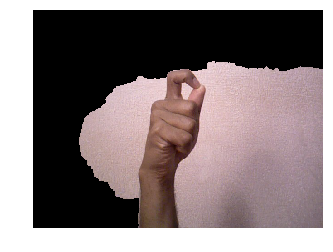

In [15]:
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

In [9]:
 cv2.drawContours(mask, [i],-1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
 new_img = cv2.bitwise_and(img, img, mask=mask)

In [11]:
 cv2.imshow("Original Image", img)

In [14]:
cv2.imwrite(new_path, new_img)

True